# Objective

The objective of this project is to generate insight as to the London Bike Sharing patterns in London. Here are some queries or insights that we can look into before starting on the project: 

1) Does the Weather affect the number of bikes being shared?

2) How does the sharing of bikes vary from time of the day?

3) Were there more bikes being shared as the months progressed?

4) How does holidays affect the amount of bike shared

5) In what season do most people ride bikes/share the bikes 

6) How does wind speed affect riding behaviour (based on weather etc)


After this EDA project, we will be trying to explore Statistical Models to predict Classification Variables (Weekend or Not) and Numeric Dependant Variables such as Count.

Below are the models for Numerical Predicted Variable:

1) Lasso CV

2) Best Reg Subset Selection with CV 


For these models, we will be trying to compare the MSE to ensure fair comparison of predictive power. The MSE can provide deeper insight into the bias-variance tradeoff. 


Below are the models for Categorical Predicted Variable:

1) Random Forests

2) SVM

3) KNN

We will be using confusion matrix and classification reports to compare the predictability of the model


In [52]:
import pandas as pd
import zipfile
import opendatasets as od
import os
#Use kaggle Api to download data 
od.download('https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset')




Skipping, found downloaded files in ".\london-bike-sharing-dataset" (use force=True to force download)


In [3]:
#open the csv file

## Main objectives:
data= pd.read_csv('C:/Users/lekai/Downloads/london-bike-sharing-dataset/london_merged.csv')

In [4]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
data.shape

(17414, 10)

In [8]:
# find the distinct values of weather code
data['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [9]:
# find the distinct values of season
data['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [10]:
data['is_holiday'].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [11]:
#change the percentage of hum
data['hum']=data['hum']/100


In [12]:
# convert holiday to yes or no
holiday_dict={
    '0.0':'No',
    '1.0':'Yes'
}

data['is_holiday']=data['is_holiday'].astype('str').map(holiday_dict)

In [13]:
weekend_dict={
    '0.0':'No',
    '1.0':'Yes'
}

data['is_weekend']=data['is_weekend'].astype('str').map(weekend_dict)

In [14]:
#creating a season dictionary to map actual written values (Classification)
season_dict={
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
    
}

weather_dict={
    '1.0':'Clear',
    '2.0':'Scattered Clouds',
    '3.0':'Broken Clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# change the seasons column to datatype string, map to dict

data['season']=data['season'].astype('str').map(season_dict)

In [15]:
# assign for weather code too
data['weather_code']=data['weather_code'].astype('str').map(weather_dict)
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,No,Yes,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,No,Yes,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,No,Yes,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,No,Yes,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,No,Yes,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken Clouds,No,No,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,No,No,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,No,No,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,No,No,winter


In [16]:
new_cols_dict={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

data.rename(new_cols_dict,axis=1,inplace=True)
data.head

<bound method NDFrame.head of                       time  count  temp_real_C  temp_feels_like_C  \
0      2015-01-04 00:00:00    182          3.0                2.0   
1      2015-01-04 01:00:00    138          3.0                2.5   
2      2015-01-04 02:00:00    134          2.5                2.5   
3      2015-01-04 03:00:00     72          2.0                2.0   
4      2015-01-04 04:00:00     47          2.0                0.0   
...                    ...    ...          ...                ...   
17409  2017-01-03 19:00:00   1042          5.0                1.0   
17410  2017-01-03 20:00:00    541          5.0                1.0   
17411  2017-01-03 21:00:00    337          5.5                1.5   
17412  2017-01-03 22:00:00    224          5.5                1.5   
17413  2017-01-03 23:00:00    139          5.0                1.0   

       humidity_percent  wind_speed_kph           weather is_holiday  \
0                 0.930             6.0     Broken Clouds         No 

In [17]:
#convert date 

from datetime import datetime
data.time=pd.to_datetime(data.time)
data['date']=data['time'].dt.date
data['time']=data['time'].dt.hour

In [18]:
# rename time to hour
data['hour']=data['time']
data.drop('time',axis=1,inplace=True)
data.head()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date,hour
0,182,3.0,2.0,0.930,6.0,Broken Clouds,No,Yes,winter,2015-01-04,0
1,138,3.0,2.5,0.930,5.0,Clear,No,Yes,winter,2015-01-04,1
2,134,2.5,2.5,0.965,0.0,Clear,No,Yes,winter,2015-01-04,2
3,72,2.0,2.0,1.000,0.0,Clear,No,Yes,winter,2015-01-04,3
4,47,2.0,0.0,0.930,6.5,Clear,No,Yes,winter,2015-01-04,4


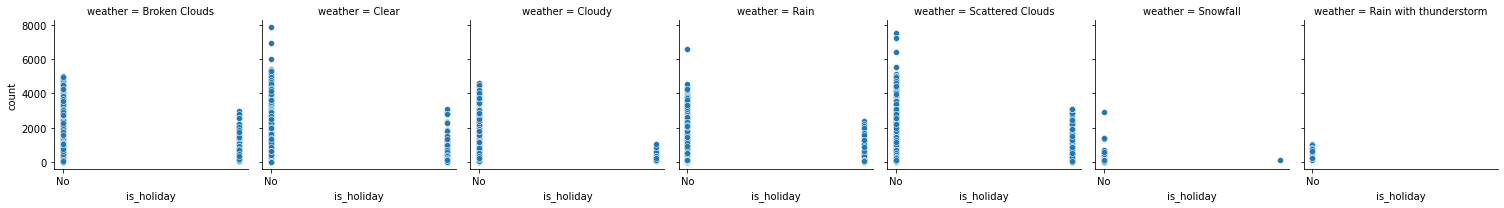

In [127]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

v= sns.FacetGrid(data,col='weather')
v.map(sns.scatterplot,'is_holiday','count')
plt.tight_layout()

#

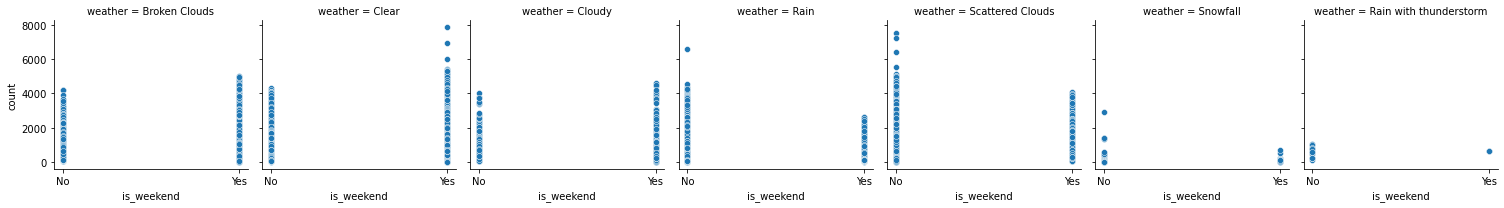

In [128]:
v= sns.FacetGrid(data,col='weather')
v.map(sns.scatterplot,'is_weekend','count')
plt.tight_layout()

C:\Users\lekai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_weekend', ylabel='count'>

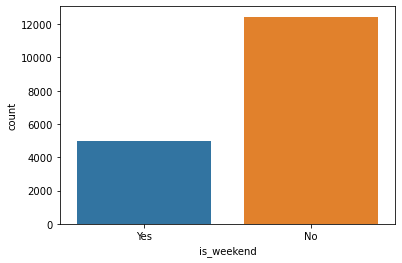

In [21]:
sns.countplot(data['is_weekend'])

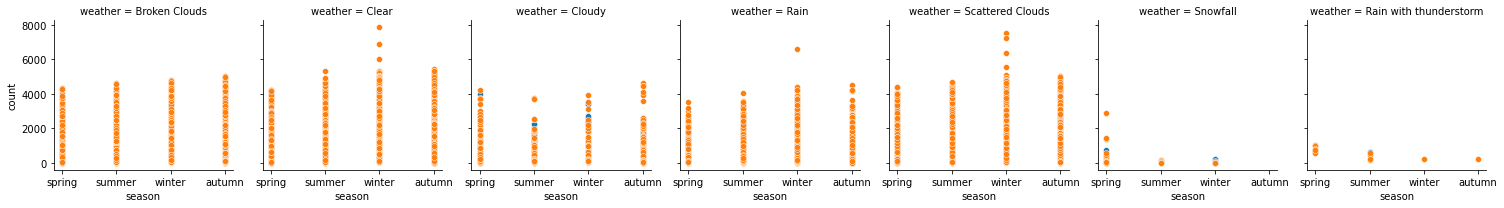

In [22]:

v= sns.FacetGrid(data,col='weather',hue='is_weekend')
v.map(sns.scatterplot,'season','count')
plt.tight_layout()

#From here we can tell, snowfall and rain with thunderstorm is definite (Most humans wont carry on with riding!Logical)
# In winter, there are more counts of riding so long as the weather is good/better (better weather, or cars cannot operate)

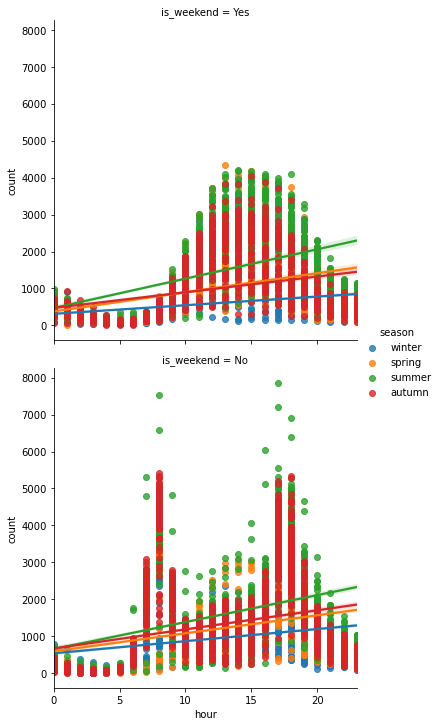

In [23]:
sns.lmplot(data=data,x='hour',y='count',row='is_weekend',hue='season')

# based on the time period, during weekends most riding happen in the afternoon/evening (centred around 4pm)
# during weekdays, steep rises during peak period for work shows that people use these bicycles to commute to work

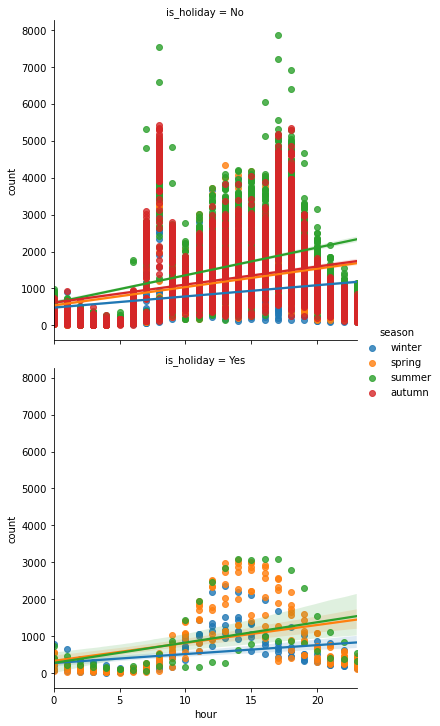

In [24]:
sns.lmplot(data=data,x='hour',y='count',row='is_holiday',hue='season')
# counts of bikes are used less during holidays. Most people do not use bike sharing during holidays in autumn


In [25]:
data

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date,hour
0,182,3.0,2.0,0.930,6.0,Broken Clouds,No,Yes,winter,2015-01-04,0
1,138,3.0,2.5,0.930,5.0,Clear,No,Yes,winter,2015-01-04,1
2,134,2.5,2.5,0.965,0.0,Clear,No,Yes,winter,2015-01-04,2
3,72,2.0,2.0,1.000,0.0,Clear,No,Yes,winter,2015-01-04,3
4,47,2.0,0.0,0.930,6.5,Clear,No,Yes,winter,2015-01-04,4
...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,0.810,19.0,Broken Clouds,No,No,winter,2017-01-03,19
17410,541,5.0,1.0,0.810,21.0,Cloudy,No,No,winter,2017-01-03,20
17411,337,5.5,1.5,0.785,24.0,Cloudy,No,No,winter,2017-01-03,21
17412,224,5.5,1.5,0.760,23.0,Cloudy,No,No,winter,2017-01-03,22


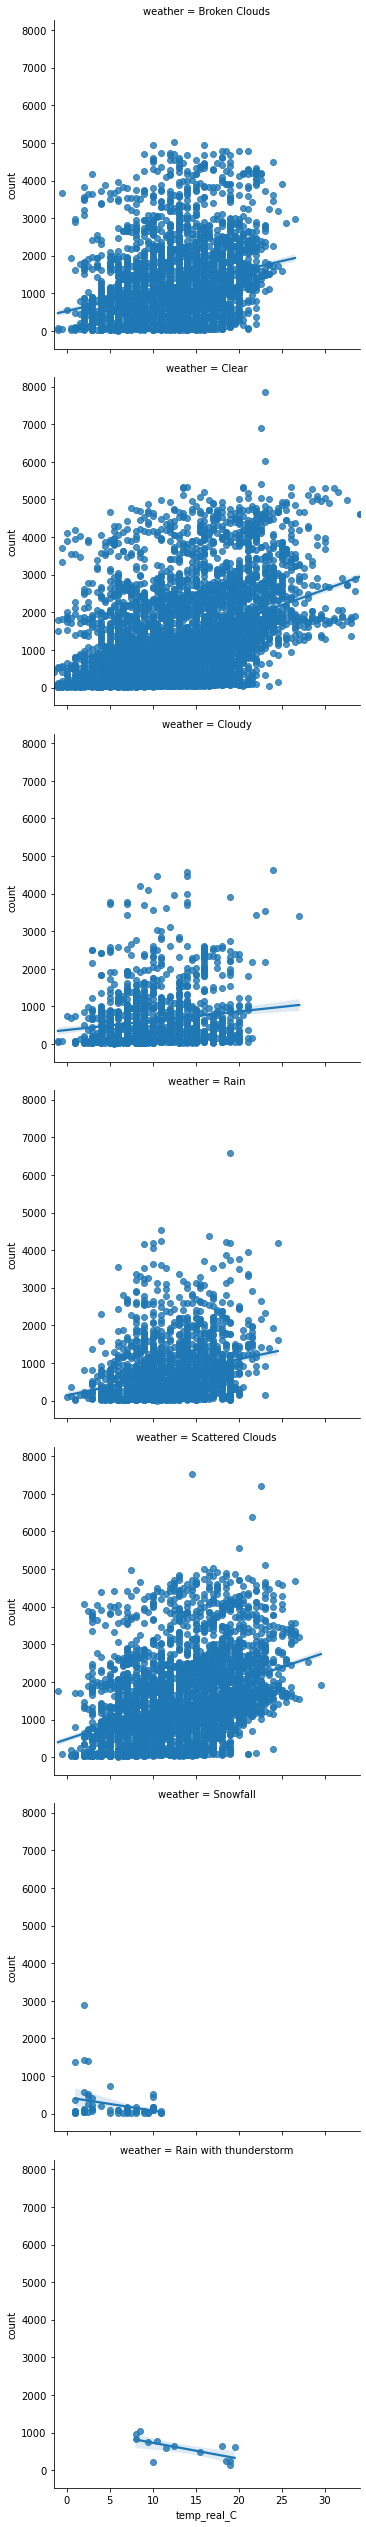

In [26]:
# how does humidity and heat affect the riding behaviour?
sns.lmplot(data=data,x='temp_real_C',y='count',row='weather')

# As the temperature increases, the count increases for most weathers except snowfall and thunderstorm, which is likely agnostic of  temperature

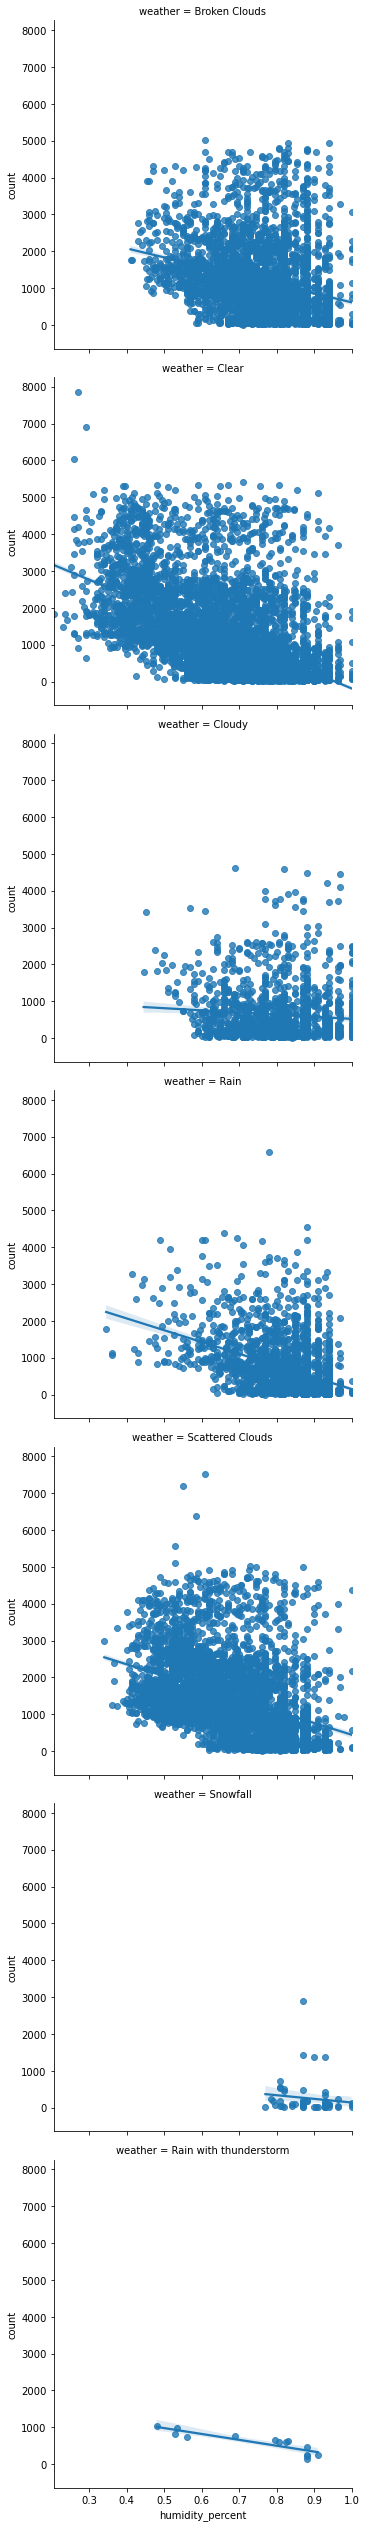

In [27]:
# how does humidity and heat affect the riding behaviour?
sns.lmplot(data=data,x='humidity_percent',y='count',row='weather')
#humidity does affect, the more humid it is the lower the counts for all weather.

<AxesSubplot:xlabel='date', ylabel='count'>

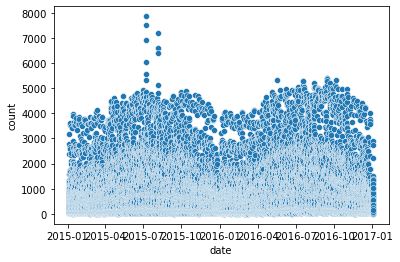

In [28]:
sns.scatterplot(data=data,x='date',y='count')
# patterns of lower counts in the start of the years (winter)

# Statistical Modelling for prediction 


#Statistical Model for Prediction of Count 

We will be doing a Lasso and Best Reg Subset Selection for the prediction of count. Because of our nature of dataframe data where there is a substantial number of classification/binary values it will be better if we read the csv file again. For these models, we will be trying to compare the MSE to ensure fair comparison of predictive power. The MSE can provide deeper insight into the bias-variance tradeoff. There will also be a exploratory section where I will utilise PCA+Lasso to predict count. The MSE is the worse out of all models.


# prediction of Weekend using SVM and Random Forest 
we will be trying to predict if weekend is being predicted correctly as we would want our model to be able to predict riding behaviour on a weekend or weekday. We will be using a Random Forest, SVM and KNN model to predict if our test cases are on a weekend or not. We will be mainly using Classification reports and Confusion Matrixes as comparison.

In [29]:
stat_data= pd.read_csv('C:/Users/lekai/Downloads/london-bike-sharing-dataset/london_merged.csv')
stat_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [30]:
# for this case we will just be renaming the naming conventions and getting the hours from the timestamp
new_cols_dict={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

stat_data.rename(new_cols_dict,axis=1,inplace=True)
stat_data.head

<bound method NDFrame.head of                       time  count  temp_real_C  temp_feels_like_C  \
0      2015-01-04 00:00:00    182          3.0                2.0   
1      2015-01-04 01:00:00    138          3.0                2.5   
2      2015-01-04 02:00:00    134          2.5                2.5   
3      2015-01-04 03:00:00     72          2.0                2.0   
4      2015-01-04 04:00:00     47          2.0                0.0   
...                    ...    ...          ...                ...   
17409  2017-01-03 19:00:00   1042          5.0                1.0   
17410  2017-01-03 20:00:00    541          5.0                1.0   
17411  2017-01-03 21:00:00    337          5.5                1.5   
17412  2017-01-03 22:00:00    224          5.5                1.5   
17413  2017-01-03 23:00:00    139          5.0                1.0   

       humidity_percent  wind_speed_kph  weather  is_holiday  is_weekend  \
0                  93.0             6.0      3.0         0.0     

In [31]:
#convert date 

from datetime import datetime
stat_data.time=pd.to_datetime(stat_data.time)

stat_data['hour']=stat_data['time'].dt.hour

In [32]:
stat_data['year']=stat_data['time'].dt.year
stat_data['month']=stat_data['time'].dt.month
stat_data['day']=stat_data['time'].dt.day

In [33]:
stat_data.drop('time',axis=1,inplace=True)



In [99]:
# lets start with our lasso model first

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X=stat_data.drop(['count'],axis=1)
y=stat_data['count']



In [85]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Lasso(alpha=alpha, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = pd.DataFrame({
    'Columns': [stat_data.columns[i]for i in range(X.shape[1])],
    'Coefficient': model.coef_
})
print(coefficients)

# high overfititng, variance. Might have to fine tune Alpha paramters to reduce overfitting 

Mean Squared Error: 843056.801099388
              Columns  Coefficient
0               count    64.513512
1         temp_real_C   -18.591564
2   temp_feels_like_C   -24.295001
3    humidity_percent    -4.427552
4      wind_speed_kph    -9.800748
5             weather  -285.102091
6          is_holiday  -203.311196
7          is_weekend    40.011373
8              season    30.542759
9                hour    95.903789
10               year     9.000244
11              month    -2.305601


In [84]:
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#This is to find the optimal regularization alpha 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LassoCV(cv=10, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# optimal alpha value found during cross-validation
print(f"Optimal alpha: {model.alpha_}")


coefficients = pd.DataFrame({
    'Columns': [stat_data.columns[i]for i in range(X.shape[1])],
    'Coefficient': model.coef_
})
print(coefficients)

#Even higher MSE error , which means there might be even higher variance between the fold-wise estimates. 
#Could be possible that there is overpenalisaing of the variables 


Mean Squared Error: 845278.0157526467
Optimal alpha: 7.29498010821824
              Columns  Coefficient
0               count    43.713223
1         temp_real_C    -1.014953
2   temp_feels_like_C   -24.592401
3    humidity_percent    -3.898041
4      wind_speed_kph    -8.493635
5             weather    -0.000000
6          is_holiday  -158.856654
7          is_weekend    37.429134
8              season    30.314445
9                hour    67.215546
10               year     7.675845
11              month    -2.538602


In [98]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Lasso(alpha=alpha, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = pd.DataFrame({
    'Columns': [stat_data.columns[i]for i in range(X.shape[1])],
    'Coefficient': model.coef_
})
print(coefficients)

#Alpha 0.5 seems to be the best

Mean Squared Error: 843051.5229659831
              Columns  Coefficient
0               count    63.309475
1         temp_real_C   -17.570666
2   temp_feels_like_C   -24.313779
3    humidity_percent    -4.397516
4      wind_speed_kph    -9.726085
5             weather  -265.417201
6          is_holiday  -200.717655
7          is_weekend    39.901784
8              season    30.527847
9                hour    94.270677
10               year     8.922322
11              month    -2.322106


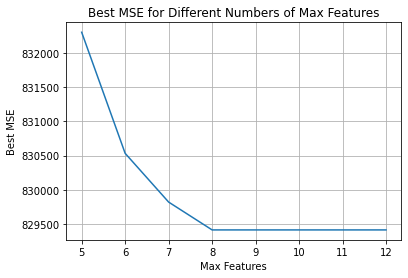

Best subset of features: [0, 2, 4, 5, 6, 8, 9, 11]
Best MSE score: 829415.7800535404


In [67]:
#Best Reg Subset Selection with CV

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import itertools
import numpy as np
from sklearn.datasets import make_regression

def best_subset_selection(X, y, cv_folds=5):
    n_features = X.shape[1]
    base_model = LinearRegression()
    
    global_best_score = float('inf')
    global_best_subset = None

    X_np = X.to_numpy()

    mse_values = []
    feature_counts = range(5, n_features+1)
    
    for max_features in feature_counts:
        local_best_score = float('-inf')
        local_best_subset = None
        
        # Generate all possible subsets of size k
        for k in range(1, max_features + 1):
            for subset in itertools.combinations(range(n_features), k):
                subset_cols = list(subset)
                scores = cross_val_score(base_model, X_np[:, subset_cols], y, cv=cv_folds, scoring='neg_mean_squared_error')

                # Calculate the mean score over all folds
                mean_score = np.mean(scores)
                if mean_score > local_best_score:
                    local_best_score = mean_score
                    local_best_subset = subset_cols

        # Update global best score and subset if a better subset is found in this iteration
        if -local_best_score < global_best_score:
            global_best_score = -local_best_score
            global_best_subset = local_best_subset
        mse_values.append(-local_best_score)

    # Plot the MSE values
    plt.figure()
    plt.plot(feature_counts, mse_values)
    plt.xlabel('Max Features')
    plt.ylabel('Best MSE')
    plt.title('Best MSE for Different Numbers of Max Features')
    plt.grid(True)
    plt.show()

    return global_best_subset, global_best_score

best_subset, best_score = best_subset_selection(X, y)

print(f"Best subset of features: {best_subset}")
print(f"Best MSE score: {best_score}")

#Using PCA to reduce the dimensionality , this section is completely exploratory it is likely Lasso should not be used anymore as a model.


In [100]:
#Using PCA to reduce the dimensionality , this section is completely exploratory it is likely Lasso should not be used anymore as a model.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data


array([[-1.69933106, -1.43928963,  1.44451693, ..., -0.99934641,
        -1.59733173, -1.33644696],
       [-1.69933106, -1.36370332,  1.44451693, ..., -0.99934641,
        -1.59733173, -1.33644696],
       [-1.78907097, -1.36370332,  1.68905371, ..., -0.99934641,
        -1.59733173, -1.33644696],
       ...,
       [-1.25063156, -1.51487593,  0.43143596, ...,  2.93656185,
        -1.59733173, -1.45016795],
       [-1.25063156, -1.51487593,  0.25676683, ...,  2.93656185,
        -1.59733173, -1.45016795],
       [-1.34037146, -1.59046224,  0.25676683, ...,  2.93656185,
        -1.59733173, -1.45016795]])

In [126]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
X_pca = pca.fit_transform(X)  
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca

,PC1,PC2
0,-27.094946,-11.070616
1,-26.912958,-11.076404
2,-31.008256,-10.975496
3,-34.259668,-10.962274
4,-26.919988,-11.110728
...,...,...
17409,-10.314228,-12.690703
17410,-9.809649,-12.742796
17411,-6.562592,-12.839182
17412,-4.306080,-12.848740


In [125]:
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#This is to find the optimal regularization alpha 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LassoCV(cv=10, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# optimal alpha value found during cross-validation
print(f"Optimal alpha: {model.alpha_}")


coefficients = pd.DataFrame({
    'Columns': [X_pca.columns[i]for i in range(X_pca.shape[1])],
    'Coefficient': model.coef_
})
print(coefficients)

#Even higher MSE error , which means  model complexity might be too high and that Lasso might just be the wrong algorithm to use

Mean Squared Error: 906039.4117807733
Optimal alpha: 8.403048824274434
  Columns  Coefficient
0     PC1    35.065976
1     PC2    -3.645162


# Predict the Classification of is_weekend (Is weekend has a differnet riding pattern).

# Random Forests

We will be using a random forest model, SVM and KNN model to predict the weekend variable.






In [68]:
weekend_dict={
    '0.0':'No',
    '1.0':'Yes'
}

from sklearn.model_selection import train_test_split
X = stat_data.drop('is_weekend',axis=1)
y = stat_data['is_weekend'].astype('str').map(weekend_dict)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfc = RandomForestClassifier(n_estimators=100) #number of trees to build
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))


[[3687   54]
 [ 364 1120]]
              precision    recall  f1-score   support

          No       0.91      0.99      0.95      3741
         Yes       0.95      0.75      0.84      1484

    accuracy                           0.92      5225
   macro avg       0.93      0.87      0.89      5225
weighted avg       0.92      0.92      0.92      5225



In [ ]:
# SVM Model 

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
#Using the Gridsearch test
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# May take awhile!
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  19.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  18.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  19.3s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  20.9s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  18.9s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  18.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  20.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  18.6s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  17.8s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  18.9s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  13.3s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  38.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  41.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  36.7s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=  35.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  48.8s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  43.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  48.3s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  51.2s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  49.5s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  26.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  28.4s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=  36.6s
[CV 4/5] END ...............

In [51]:
# the svm model is less robust in predicitng if the days are a weekend or not based on the Confusion matrix and classification report.

[[3452  328]
 [ 773  672]]
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      3780
         Yes       0.67      0.47      0.55      1445

    accuracy                           0.79      5225
   macro avg       0.74      0.69      0.71      5225
weighted avg       0.78      0.79      0.78      5225



Text(0, 0.5, 'Error Rate')

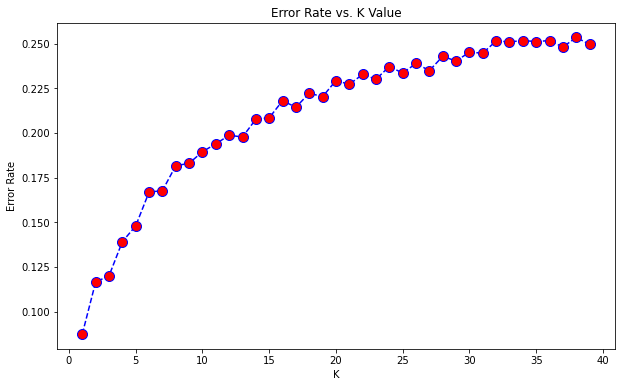

In [75]:
#Next, we will try using KNN to test for predicitability of Weekend 
#Standardise the Variable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
scaler.fit(stat_data.drop('is_weekend',axis=1))
scaled_features = scaler.transform(stat_data.drop('is_weekend',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=X.columns[:,])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)


error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Even though we might be at a risk of overfitting, error rate keeps increasing and hence I have decided to use KNN of 1 to create my final KNN model



In [76]:
knn = KNeighborsClassifier(n_neighbors=1) # we try with k=1
knn.fit(X_train,y_train) 
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

#The output shows a relatively strong predictive power. However, the Random Forest Model is stronger in prediction.
#One thing to note is that the amount of false negative for the Random forest model is higher than the KNN model, which means a lower precision in predicitng 'NO'.
#Recalll for 'NO' in random forest model is high, which means it has a very low percentage error for predicitng False Positives


[[3494  243]
 [ 214 1274]]
              precision    recall  f1-score   support

          No       0.94      0.93      0.94      3737
         Yes       0.84      0.86      0.85      1488

    accuracy                           0.91      5225
   macro avg       0.89      0.90      0.89      5225
weighted avg       0.91      0.91      0.91      5225

